In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime 
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from google.colab import files
files.upload()

Saving cleaned_movie_withNLP (1).csv to cleaned_movie_withNLP (1) (1).csv


{'cleaned_movie_withNLP (1).csv': b',Unnamed: 0,Unnamed: 0.1,id,budget,genres,homepage,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_Thriller,genres_War,The sum of genres,production_companies_Amblin Entertainment,production_companies_Columbia Pictures,production_companies_Columbia Pictures Corporation,production_companies_Dark Horse Entertainment,production_companies_DreamWorks Animation,production_companies_DreamWorks SKG,production_companies_Dune Entertainment,production_companies_Legendary Pictures,production_companies_Lionsgate,production_companies_New Line Cinema,production_companies_Paramount Pictures,production_companies_Relati

In [5]:
movie = pd.read_csv("cleaned_movie_withNLP (1).csv")
movie.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'budget',
       'genres', 'homepage', 'original_language', 'original_title', 'overview',
       ...
       'Keywords_superhero', 'Keywords_suspense', 'Keywords_teenager',
       'Keywords_vampire', 'Keywords_violence', 'Keywords_war',
       'Keywords_witch', 'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood'],
      dtype='object', length=118)

In [7]:
#dropping unnecessary columns
def drop_col(df):
  return df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 
                          'id','homepage','original_title','spoken_languages'])
m_drop = drop_col(movie.copy())
m_drop.columns

Index(['budget', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'tagline',
       ...
       'Keywords_superhero', 'Keywords_suspense', 'Keywords_teenager',
       'Keywords_vampire', 'Keywords_violence', 'Keywords_war',
       'Keywords_witch', 'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood'],
      dtype='object', length=111)

In [8]:
#checking if any is null/nan/empty
m_drop.isnull().sum()

budget                                                        0
genres                                                        0
original_language                                             0
overview                                                      0
popularity                                                    0
production_companies                                          0
production_countries                                          0
release_date                                                  0
runtime                                                       0
tagline                                                       0
title                                                         0
Keywords                                                      0
cast                                                          0
crew                                                          0
genres_Action                                                 0
genres_Adventure                        

In [0]:
#checking the top titles
title = m_drop.loc[:,['title','popularity']]

In [10]:
top10_title = title.nlargest(10,'popularity')
top10_title

title  popularity
204  The Hunger Games: Mockingjay - Part 1  147.098006
205                     Ghost in the Shell   68.726676
217                   The Legend of Tarzan   45.382980
221                         Doctor Strange   43.847654
227                          Suicide Squad   42.965027
206                              Star Wars   42.149697
166         Rise of the Planet of the Apes   41.613762
214                          Before I Fall   38.995136
236           Rogue One: A Star Wars Story   36.567575
275                                   Lucy   36.447603

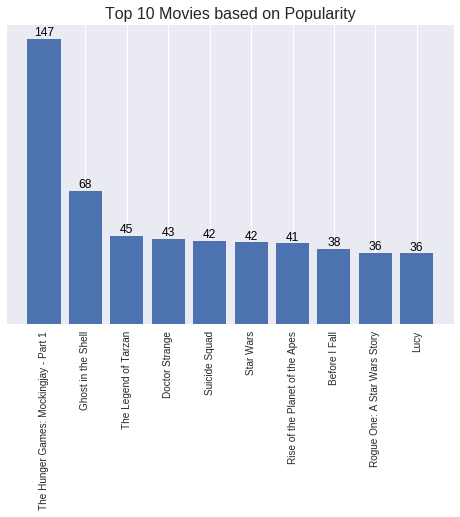

In [11]:
labels = ['The Hunger Games: Mockingjay - Part 1', 'Ghost in the Shell',
          'The Legend of Tarzan','Doctor Strange','Suicide Squad',
          'Star Wars','Rise of the Planet of the Apes','Before I Fall',
          'Rogue One: A Star Wars Story', 'Lucy']

plt.bar(top10_title['title'], top10_title['popularity'])
plt.xticks(rotation=90)
plt.yticks([])
plt.title('Top 10 Movies based on Popularity', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

Text(0.5, 1.0, 'Popularity vs Runtime')

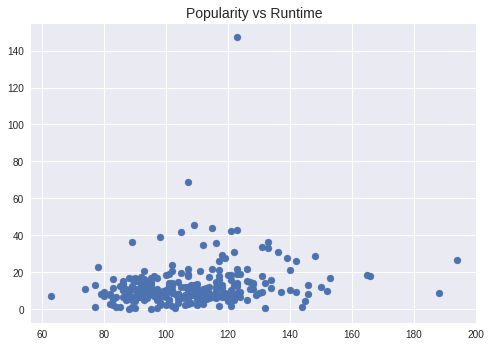

In [12]:
#checking the runtime 
plt.scatter(m_drop['runtime'],m_drop['popularity'])
plt.title('Popularity vs Runtime',fontsize=14)

In [0]:
#changing the original language as it isnt clear
m_drop.replace({'en': 'English','fr':'French','ko':'Korean',
               'ja': 'Japanese','ca': 'Catalan','zh':'Chinese',
               'th':'Thai','sv':'Swedish','hi':'Hindi','es':'Spanish',
               'de':'German'}, inplace=True)

In [14]:
m_drop['original_language'].head(10)

0     French
1    English
2    English
3    English
4    English
5    English
6    English
7    English
8    English
9    English
Name: original_language, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Original Language')

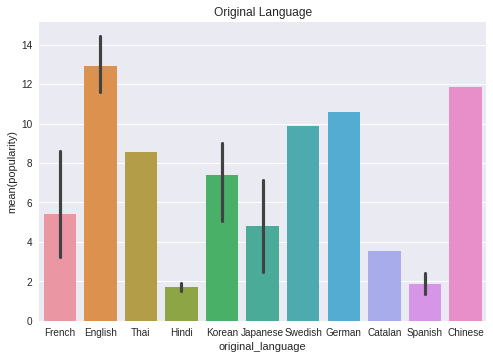

In [17]:
sns.barplot(y='popularity',x='original_language',data=m_drop)
plt.title('Original Language')

In [18]:
#finding the top genres
genres = m_drop.drop(columns=['budget','original_language',
                                  'genres','overview',
                                  'popularity','production_companies',
                                  'release_date','runtime','tagline',
                                 'title','Keywords',
                                 'Keywords_superhero', 'Keywords_suspense', 'Keywords_teenager',
       'Keywords_vampire', 'Keywords_violence', 'Keywords_war',
       'Keywords_witch', 'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood',
      'The sum of genres', 'production_companies_Amblin Entertainment',
       'production_companies_Columbia Pictures',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Dark Horse Entertainment',
       'production_companies_DreamWorks Animation',
       'production_companies_DreamWorks SKG',
       'production_companies_Dune Entertainment',
       'production_companies_Legendary Pictures',
       'production_companies_Lionsgate',
       'production_companies_New Line Cinema',
       'production_companies_Paramount Pictures',
       'production_companies_Relativity Media',
       'production_companies_Summit Entertainment',
       'production_companies_The Weinstein Company',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Universal Pictures',
       'production_companies_Village Roadshow Pictures',
       'production_companies_Walden Media',
       'production_companies_Walt Disney Pictures',
       'production_companies_Warner Bros.', 'The sum of production_companies',
       'Keywords_3d', 'Keywords_aftercreditsstinger', 'Keywords_airplane',
       'Keywords_alcohol', 'Keywords_alcoholism', 'Keywords_alien',
       'Keywords_based on comic', 'Keywords_based on novel',
       'Keywords_based on true story', 'Keywords_based on young adult novel',
       'Keywords_biography', 'Keywords_cia', 'Keywords_daughter',
       'Keywords_drug', 'Keywords_duringcreditsstinger',
       'Keywords_dying and death', 'Keywords_dystopia', 'Keywords_england',
       'Keywords_family', 'Keywords_female nudity', 'Keywords_fight',
       'Keywords_friendship', 'Keywords_gore', 'Keywords_high school',
       'Keywords_imax', 'Keywords_independent film', 'Keywords_infidelity',
       'Keywords_island', 'Keywords_jealousy', 'Keywords_london england',
       'Keywords_love', 'Keywords_magic', 'Keywords_marvel comic',
       'Keywords_monster', 'Keywords_murder', 'Keywords_musical',
       'Keywords_nudity', 'Keywords_paris', 'Keywords_party',
       'Keywords_prison', 'Keywords_remake', 'Keywords_revenge',
       'Keywords_robot', 'Keywords_secret', 'Keywords_secret identity',
       'Keywords_sequel', 'Keywords_sex', 'Keywords_sport',
       'production_countries', 'cast', 'crew'])
genres.columns

Index(['genres_Action', 'genres_Adventure', 'genres_Animation',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_History', 'genres_Horror',
       'genres_Music', 'genres_Mystery', 'genres_Romance',
       'genres_Science Fiction', 'genres_Thriller', 'genres_War'],
      dtype='object')

In [19]:
genre_sum = genres.sum()
genre_sum.sort_values(ascending=False)

genres_Drama              115
genres_Comedy              92
genres_Thriller            78
genres_Action              74
genres_Adventure           72
genres_Science Fiction     47
genres_Romance             47
genres_Fantasy             45
genres_Family              41
genres_Crime               33
genres_Animation           32
genres_Horror              28
genres_Mystery             18
genres_Documentary         12
genres_History             11
genres_Music               10
genres_War                 10
dtype: int64

In [0]:
## downloading it into csv
#genre_sum.to_csv('genre_sum.csv', index=True, header=True)
#files.download('genre_sum.csv')

In [21]:
#taking the top 10 genres
top10_genres = genre_sum.nlargest(10)
top10_genres

genres_Drama              115
genres_Comedy              92
genres_Thriller            78
genres_Action              74
genres_Adventure           72
genres_Romance             47
genres_Science Fiction     47
genres_Fantasy             45
genres_Family              41
genres_Crime               33
dtype: int64

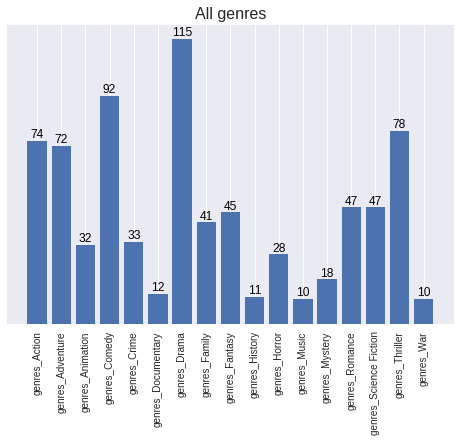

In [22]:
plt.bar(genre_sum.index, genre_sum)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('All genres', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

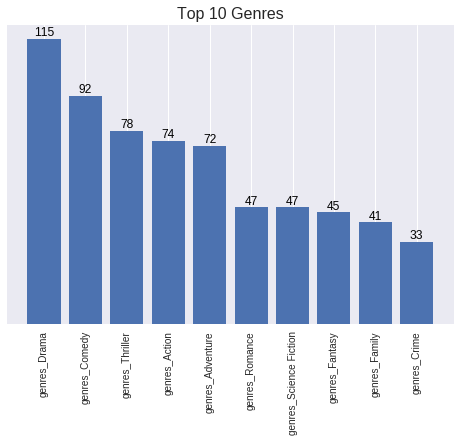

In [23]:
plt.bar(top10_genres.index, top10_genres)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('Top 10 Genres', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

In [24]:
#getting the top 10 production companies
production = m_drop.drop(columns=['budget','original_language',
                                  'genres','overview',
                                  'popularity','production_companies',
                                  'release_date','runtime','tagline',
                                 'title','Keywords',
                                 'Keywords_superhero', 'Keywords_suspense', 'Keywords_teenager',
       'Keywords_vampire', 'Keywords_violence', 'Keywords_war',
       'Keywords_witch', 'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood',
      'The sum of genres', 'production_companies_Amblin Entertainment',
       'The sum of production_companies',
       'Keywords_3d', 'Keywords_aftercreditsstinger', 'Keywords_airplane',
       'Keywords_alcohol', 'Keywords_alcoholism', 'Keywords_alien',
       'Keywords_based on comic', 'Keywords_based on novel',
       'Keywords_based on true story', 'Keywords_based on young adult novel',
       'Keywords_biography', 'Keywords_cia', 'Keywords_daughter',
       'Keywords_drug', 'Keywords_duringcreditsstinger',
       'Keywords_dying and death', 'Keywords_dystopia', 'Keywords_england',
       'Keywords_family', 'Keywords_female nudity', 'Keywords_fight',
       'Keywords_friendship', 'Keywords_gore', 'Keywords_high school',
       'Keywords_imax', 'Keywords_independent film', 'Keywords_infidelity',
       'Keywords_island', 'Keywords_jealousy', 'Keywords_london england',
       'Keywords_love', 'Keywords_magic', 'Keywords_marvel comic',
       'Keywords_monster', 'Keywords_murder', 'Keywords_musical',
       'Keywords_nudity', 'Keywords_paris', 'Keywords_party',
       'Keywords_prison', 'Keywords_remake', 'Keywords_revenge',
       'Keywords_robot', 'Keywords_secret', 'Keywords_secret identity',
       'Keywords_sequel', 'Keywords_sex', 'Keywords_sport',
       'production_countries', 'cast', 'crew',
       'genres_Action', 'genres_Adventure', 'genres_Animation',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_History', 'genres_Horror',
       'genres_Music', 'genres_Mystery', 'genres_Romance',
       'genres_Science Fiction', 'genres_Thriller', 'genres_War'])
production.columns

Index(['production_companies_Columbia Pictures',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Dark Horse Entertainment',
       'production_companies_DreamWorks Animation',
       'production_companies_DreamWorks SKG',
       'production_companies_Dune Entertainment',
       'production_companies_Legendary Pictures',
       'production_companies_Lionsgate',
       'production_companies_New Line Cinema',
       'production_companies_Paramount Pictures',
       'production_companies_Relativity Media',
       'production_companies_Summit Entertainment',
       'production_companies_The Weinstein Company',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Universal Pictures',
       'production_companies_Village Roadshow Pictures',
       'production_companies_Walden Media',
       'production_companies_Walt Disney Pictures',
       'production_companies_Warner Bros.'],
      dtype='object')

In [25]:
#getting top production companies
production_sum = production.sum()
production_sum

production_companies_Columbia Pictures                         16
production_companies_Columbia Pictures Corporation              7
production_companies_Dark Horse Entertainment                   5
production_companies_DreamWorks Animation                       6
production_companies_DreamWorks SKG                             5
production_companies_Dune Entertainment                         6
production_companies_Legendary Pictures                         8
production_companies_Lionsgate                                  7
production_companies_New Line Cinema                            5
production_companies_Paramount Pictures                        22
production_companies_Relativity Media                          15
production_companies_Summit Entertainment                      10
production_companies_The Weinstein Company                      7
production_companies_Twentieth Century Fox Film Corporation    12
production_companies_Universal Pictures                        19
production

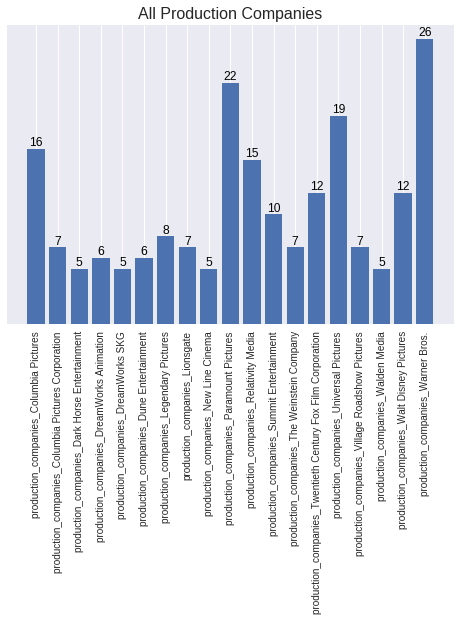

In [26]:
plt.bar(production_sum.index, production_sum)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('All Production Companies', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

In [0]:
##downloading the production sum 
#production_sum.to_csv('production_sum.csv', index=True, header=False)
#files.download('production_sum.csv')

In [28]:
top5_pc = production_sum.nlargest(5)
top5_pc

production_companies_Warner Bros.          26
production_companies_Paramount Pictures    22
production_companies_Universal Pictures    19
production_companies_Columbia Pictures     16
production_companies_Relativity Media      15
dtype: int64

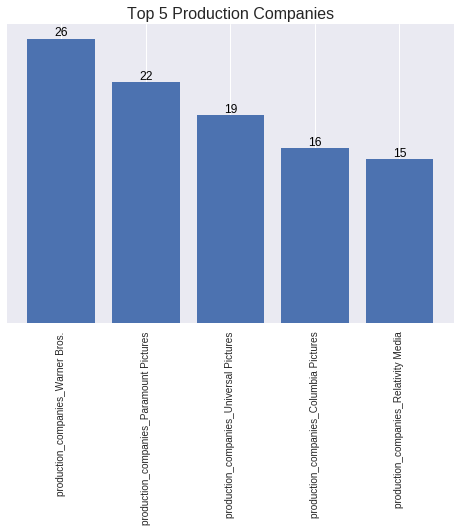

In [29]:
plt.bar(top5_pc.index, top5_pc)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('Top 5 Production Companies', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

In [30]:
#fincing top keywords
keyword = m_drop.drop(columns=['budget','original_language',
                                  'genres','overview',
                                  'popularity','production_companies',
                                  'release_date','runtime','tagline',
                                 'title','Keywords',
                                 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood',
      'The sum of genres', 'production_companies_Amblin Entertainment',
       'The sum of production_companies',
       'production_countries', 'cast', 'crew',
       'genres_Action', 'genres_Adventure', 'genres_Animation',
       'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama',
       'genres_Family', 'genres_Fantasy', 'genres_History', 'genres_Horror',
       'genres_Music', 'genres_Mystery', 'genres_Romance',
       'genres_Science Fiction', 'genres_Thriller', 'genres_War',
       'production_companies_Columbia Pictures',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Dark Horse Entertainment',
       'production_companies_DreamWorks Animation',
       'production_companies_DreamWorks SKG',
       'production_companies_Dune Entertainment',
       'production_companies_Legendary Pictures',
       'production_companies_Lionsgate',
       'production_companies_New Line Cinema',
       'production_companies_Paramount Pictures',
       'production_companies_Relativity Media',
       'production_companies_Summit Entertainment',
       'production_companies_The Weinstein Company',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Universal Pictures',
       'production_companies_Village Roadshow Pictures',
       'production_companies_Walden Media',
       'production_companies_Walt Disney Pictures',
       'production_companies_Warner Bros.'])
keyword.columns

Index(['Keywords_3d', 'Keywords_aftercreditsstinger', 'Keywords_airplane',
       'Keywords_alcohol', 'Keywords_alcoholism', 'Keywords_alien',
       'Keywords_based on comic', 'Keywords_based on novel',
       'Keywords_based on true story', 'Keywords_based on young adult novel',
       'Keywords_biography', 'Keywords_cia', 'Keywords_daughter',
       'Keywords_drug', 'Keywords_duringcreditsstinger',
       'Keywords_dying and death', 'Keywords_dystopia', 'Keywords_england',
       'Keywords_family', 'Keywords_female nudity', 'Keywords_fight',
       'Keywords_friendship', 'Keywords_gore', 'Keywords_high school',
       'Keywords_imax', 'Keywords_independent film', 'Keywords_infidelity',
       'Keywords_island', 'Keywords_jealousy', 'Keywords_london england',
       'Keywords_love', 'Keywords_magic', 'Keywords_marvel comic',
       'Keywords_monster', 'Keywords_murder', 'Keywords_musical',
       'Keywords_nudity', 'Keywords_paris', 'Keywords_party',
       'Keywords_prison', 'Keywor

In [31]:
keyword_sum = keyword.sum()
keyword_sum

Keywords_3d                            17
Keywords_aftercreditsstinger           19
Keywords_airplane                       5
Keywords_alcohol                        5
Keywords_alcoholism                     5
Keywords_alien                         10
Keywords_based on comic                 9
Keywords_based on novel                21
Keywords_based on true story            5
Keywords_based on young adult novel     7
Keywords_biography                      9
Keywords_cia                            5
Keywords_daughter                       5
Keywords_drug                           6
Keywords_duringcreditsstinger          38
Keywords_dying and death               10
Keywords_dystopia                      10
Keywords_england                        5
Keywords_family                         5
Keywords_female nudity                  5
Keywords_fight                          5
Keywords_friendship                     9
Keywords_gore                           5
Keywords_high school              

In [0]:
#keyword_sum.to_csv('keyword_sum.csv', index=True, header=False)
#files.download('keyword_sum.csv')

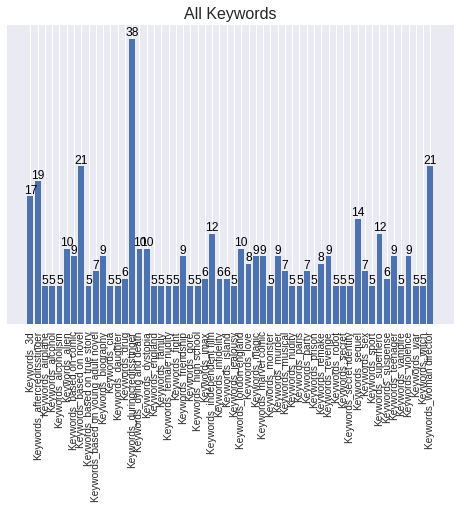

In [33]:
plt.bar(keyword_sum.index, keyword_sum)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('All Keywords', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()


In [34]:
top_keywords = keyword_sum.nlargest(10)
top_keywords

Keywords_duringcreditsstinger    38
Keywords_based on novel          21
Keywords_woman director          21
Keywords_aftercreditsstinger     19
Keywords_3d                      17
Keywords_sequel                  14
Keywords_independent film        12
Keywords_superhero               12
Keywords_alien                   10
Keywords_dying and death         10
dtype: int64

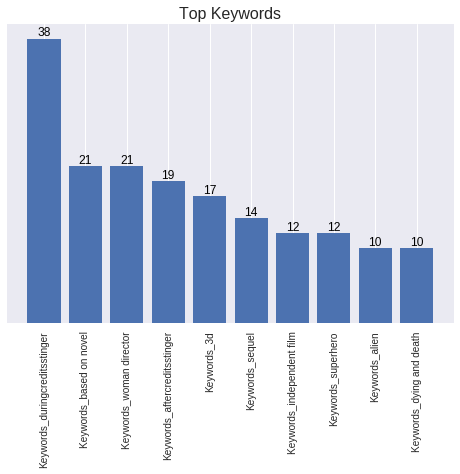

In [35]:
plt.bar(top_keywords.index, top_keywords)
plt.xticks(rotation=90)
plt.yticks([])
plt.title('Top Keywords', fontsize=16)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

In [0]:
## getting the 2 main actors
cast_1 = m_drop['cast'].str.split("name",n=1, expand=True)
str1 = cast_1[1].str.split(":", n=1, expand=True)
str2 = str1[1].str.split(",", n=1, expand=True)
str3 = str2[0].str.split("'", n=1, expand=True)
str4 = str3[1].str.split("'", n=1, expand=True)

#str4.head()
m_drop['actor_1'] = str4[0]
#movie_drop['actor_1'].head()

str5 = str2[1].str.split("name", n=1, expand=True)
str6 = str5[1].str.split(":", n=1, expand=True)
str7 = str6[1].str.split(",", n=1, expand=True)
str8 = str7[0].str.split("'", n=1, expand=True)
str9 = str8[1].str.split("'", n=1, expand=True)

m_drop['actor_2'] = str9[0]

In [37]:
m_drop.loc[:,['actor_1','actor_2']].head()

actor_1                      actor_2
0   Lubna Azabal  M√©lissa D√©sormeaux-Poulin
1  Anne Hathaway                 James McAvoy
2      Tom Hanks                    Tim Allen
3   Rachel Weisz                 Adrien Brody
4  Michael Sheen                  Maria Bello

In [38]:
#sorting out the dates
m_drop['release_date'].head()

0     2009/4/10 0:00
1      2003/2/7 0:00
2           10/30/99
3      2009/9/8 0:00
4    2009/12/10 0:00
Name: release_date, dtype: object

In [39]:
#somehow for the jungle book & anther movie the year is wrong but 
#its fixable
m_drop['release_date'] = pd.to_datetime(m_drop['release_date']).dt.date.astype(str)
m_drop['release_date'].head()

0    2009-04-10
1    2003-02-07
2    1999-10-30
3    2009-09-08
4    2009-12-10
Name: release_date, dtype: object

In [0]:
#dummifiying it 
#movie_drop['release_date'].str.split("-", n=1, expand=True)
m1 = m_drop['release_date'].str.split('-', n=1, expand=True)
m_drop['release_year'] = m1[0]

m2 = m1[1].str.split('-', n=1, expand=True)

m_drop['release_month'] = m2[0]

m_drop['release_day'] = m2[1]


In [41]:
m_drop.loc[:, ['release_day','release_month','release_year', 'release_date']].head()

release_day release_month release_year release_date
0          10            04         2009   2009-04-10
1          07            02         2003   2003-02-07
2          30            10         1999   1999-10-30
3          08            09         2009   2009-09-08
4          10            12         2009   2009-12-10

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

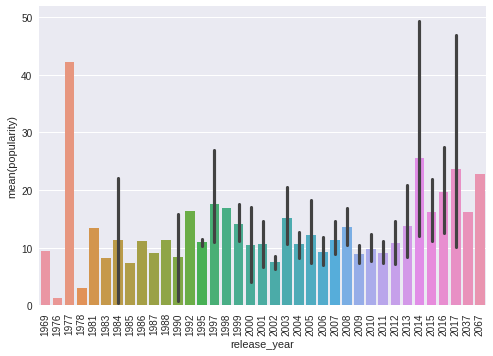

In [43]:
sns.barplot(x='release_year', y='popularity', data=m_drop)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Popularity based on day')

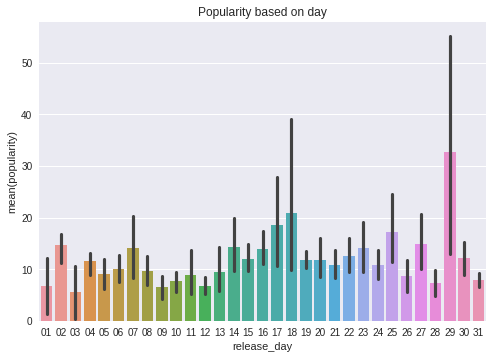

In [44]:
sns.barplot(x='release_day', y='popularity', data=m_drop)
plt.title('Popularity based on day')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

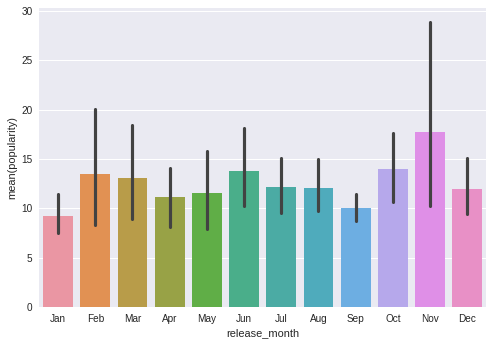

In [45]:
#plt.figure(figsize=(10,15))
sns.barplot(x='release_month', y='popularity', data=m_drop)
plt.gca().set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                     'Jul','Aug','Sep','Oct','Nov','Dec'])

In [0]:
#getting production coutries/locations
p1 = m_drop['production_countries'].str.split('name', n=1, expand=True)
p2 = p1[1].str.split(":", n=1, expand=True)
p3 = p2[1].str.split(":",n=1, expand=True)
p4 = p3[0].str.split("'", n=1, expand=True)
p5 = p4[1].str.split("'", n=1, expand=True)

m_drop['prod_countries'] = p5[0]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

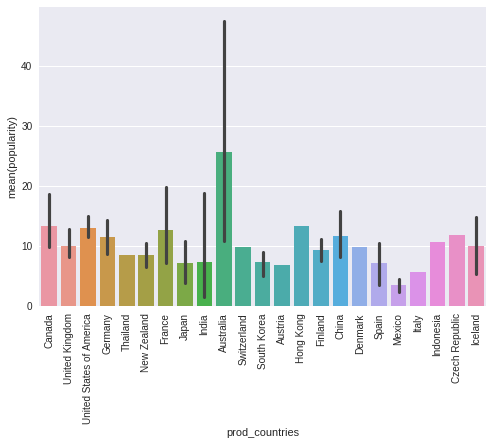

In [47]:
sns.barplot(x='prod_countries',y='popularity',data=m_drop)
plt.xticks(rotation=90)

In [0]:
#getting direction from crew

d1 = m_drop['crew'].str.split('Director',n=1,expand=True)
d2 = d1[1].str.split("name",n=1,expand=True)
d3 = d2[1].str.split(':',n=1,expand=True)
d4 = d3[1].str.split(',',n=1,expand=True)
d5 = d4[0].str.split("'",n=1,expand=True)
d6 = d5[1].str.split("'", n=1, expand=True)
m_drop['director'] = d6[0]

In [49]:
m_drop.loc[:,['director','popularity']].head()

director  popularity
0  Denis Villeneuve    8.596012
1    Julian Jarrold    7.829737
2       Lee Unkrich   17.547693
3      Rian Johnson    7.973126
4          Shawn Ku    2.114833

In [50]:
m1 = m_drop.drop(columns=['genres','overview',
                          'production_companies',
                          'production_countries','release_date',
                          'Keywords','tagline',
                          'cast','crew','title'])
m1.columns

Index(['budget', 'original_language', 'popularity', 'runtime', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary',
       ...
       'Keywords_woman director', 'The sum of Keywords',
       'Director_name(if more than 2 for the moive)_Clint Eastwood', 'actor_1',
       'actor_2', 'release_year', 'release_month', 'release_day',
       'prod_countries', 'director'],
      dtype='object', length=108)

In [51]:
m1.isnull().sum().tail(10)

Keywords_woman director                                       0
The sum of Keywords                                           0
Director_name(if more than 2 for the moive)_Clint Eastwood    0
actor_1                                                       1
actor_2                                                       2
release_year                                                  0
release_month                                                 0
release_day                                                   0
prod_countries                                                0
director                                                      0
dtype: int64

In [0]:
m1['actor_1'].fillna('no-actor', inplace=True)
m1['actor_2'].fillna('no-actor',inplace=True)

In [78]:
#replacing the odd years
m1['release_year'].replace(to_replace=['2067','2037'],value=['1967','1937'], inplace=True)
m1['release_year'].sort_values(ascending=True).head()

228    1937
132    1967
150    1969
139    1976
206    1977
Name: release_year, dtype: object

In [0]:
m1.to_csv('m1.csv')
files.download('m1.csv')

In [53]:
m2 = pd.get_dummies(m1)
m2.columns

Index(['budget', 'popularity', 'runtime', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama',
       ...
       'director_Troy Sizemore', 'director_Uta Briesewitz',
       'director_Vic Armstrong', 'director_Wayne Kramer',
       'director_William Brent Bell', 'director_Wolfgang Becker',
       'director_Wolfgang Reitherman', 'director_Xavier Grobet',
       'director_Zach Helm', 'director_Zack Snyder'],
      dtype='object', length=989)

In [55]:
#removing low frequency columns 
sum_df = m2.sum()
list_col = list(m2)

counter = 0
for x in sum_df:
  if x < 2:
    m2.pop(list_col[counter])
  counter=counter+1

m2.columns

Index(['budget', 'popularity', 'runtime', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama',
       ...
       'director_Kimberly Peirce', 'director_Lasse Hallstr√∂m',
       'director_Ron Clements', 'director_Sam Raimi',
       'director_Seamus McGarvey', 'director_Steven Spielberg',
       'director_Tim Burton', 'director_Tobias A. Schliessler',
       'director_William Brent Bell', 'director_Xavier Grobet'],
      dtype='object', length=266)

In [56]:
y = m2.pop('popularity')
x = sm.add_constant(m2.astype(float))
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     1.614
Date:                Thu, 11 Apr 2019   Prob (F-statistic):             0.0470
Time:                        09:48:08   Log-Likelihood:                -755.09
No. Observations:                 291   AIC:                             2024.
Df Residuals:                      34   BIC:                             2968.
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [65]:
from week2_helpers import variance_inflation_factor

# Calculate VIF values for each column.
vif = variance_inflation_factor(x)

"""You shouldn't need to modify the code below (unless you change variable names)"""
#df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
#df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
#df_coeffs_sorted.style.bar(subset = ["Coefficients", "p"], align='mid', color=['#d65f5f', '#5fba7d'])


df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

In [66]:
df_vif = x.loc[:, vif["vif"] <= 5]

# Complete this
x_vif = sm.add_constant(df_vif.astype(float))
model_vif = sm.OLS(y, x_vif).fit()

print(model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2.393
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.06e-07
Time:                        09:55:49   Log-Likelihood:                -959.25
No. Observations:                 291   AIC:                             2200.
Df Residuals:                     150   BIC:                             2718.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [67]:
vif = variance_inflation_factor(df_vif.astype(float))

df_coeffs = pd.DataFrame({"Coefficients": model_vif.params, "p": model_vif.pvalues, "vif": vif["vif"]})
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])